In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [2]:
import tensorboard as tb
from scipy import stats
import seaborn as sns

In [3]:
tb.__version__

'2.13.0'

In [4]:
# from tensorflow.python.summary.summary_iterator import summary_iterator


In [5]:
# """
# code modified from this gist on github: https://gist.github.com/laszukdawid/62656cf7b34cac35b325ba21d46ecfcd
# blog post here: https://laszukdawid.com/blog/2021/01/26/parsing-tensorboard-data-locally/
# """

# def convert_tb_data(root_dir, sort_by=None):
#     """Convert local TensorBoard data into Pandas DataFrame.
    
#     Function takes the root directory path and recursively parses
#     all events data.    
#     If the `sort_by` value is provided then it will use that column
#     to sort values; typically `wall_time` or `step`.
    
#     *Note* that the whole data is converted into a DataFrame.
#     Depending on the data size this might take a while. If it takes
#     too long then narrow it to some sub-directories.
    
#     Paramters:
#         root_dir: (str) path to root dir with tensorboard data.
#         sort_by: (optional str) column name to sort by.
    
#     Returns:
#         pandas.DataFrame with [wall_time, name, step, value] columns.
    
#     """

#     def convert_tfevent(filepath):
#         return pd.DataFrame([
#             parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
#         ])

#     def parse_tfevent(tfevent):
#         return dict(
#             wall_time=tfevent.wall_time,
#             name=tfevent.summary.value[0].tag,
#             step=tfevent.step,
#             value=float(tfevent.summary.value[0].simple_value),
#         )
    
#     columns_order = ['exp_step', 'wall_time', 'name', 'step', 'value']
    
#     out = []
#     for exp_dir in os.listdir(root_dir):
#         exp_dir_path = os.path.join(root_dir, exp_dir)
#         # print(exp_dir_path)
#         # print("all: ", os.listdir(exp_dir_path))
#         filenames = list(filter(lambda x: os.path.isfile(os.path.join(exp_dir_path, x)), os.listdir(exp_dir_path)))
#         # print("filtered: ", filenames)
#         for filename in filenames:
#             # print(filename)
#             if "events.out.tfevents" not in filename:
#                 continue
#             file_full_path = os.path.join(root_dir, exp_dir, filename)
#             file_df = convert_tfevent(file_full_path)
#             file_df['exp_step'] = exp_dir
#             out.append(file_df)
#     # print(out)

#     # Concatenate (and sort) all partial individual dataframes
#     all_df = pd.concat(out)[columns_order]
#     if sort_by is not None:
#         all_df = all_df.sort_values(sort_by)
        
#     return all_df.reset_index(drop=True)



In [6]:

# dir_path = "log/coco/transpose_r_mod/osiris/exp9/"
# # exp_name = "exp9_step1_scalingBN_2024-07-30-11-22"
# exp_name = ""
# df = convert_tb_data(f"{dir_path}/{exp_name}")

# print(df)

In [7]:
exp9_res = pd.read_csv("exp9_results.csv", index_col=0)

In [8]:
pd.unique(exp9_res['exp_step'])

array(['exp9_step1_finetune_2024-07-30-12-39',
       'exp9_step1_scalingBN_2024-07-30-11-22',
       'exp9_step2_finetune_2024-07-30-13-33',
       'exp9_step2_scalingBN_2024-07-30-13-18',
       'exp9_step3_finetune_2024-08-05-09-02',
       'exp9_step3_scalingBN_2024-08-05-08-26',
       'exp9_step4_finetune_2024-08-05-09-51',
       'exp9_step4_scalingBN_2024-08-05-09-35',
       'exp9_step5_finetune_2024-08-05-10-39',
       'exp9_step5_scalingBN_2024-08-05-10-28',
       'exp9_step6_finetune_2024-08-05-11-26',
       'exp9_step6_scalingBN_2024-08-05-11-12'], dtype=object)

In [9]:
pd.unique(exp9_res["name"])

array(['train_loss', 'train_acc', 'valid_loss', 'valid_acc'], dtype=object)

57
228
57
228
57
228
57
228
57
228
57
228


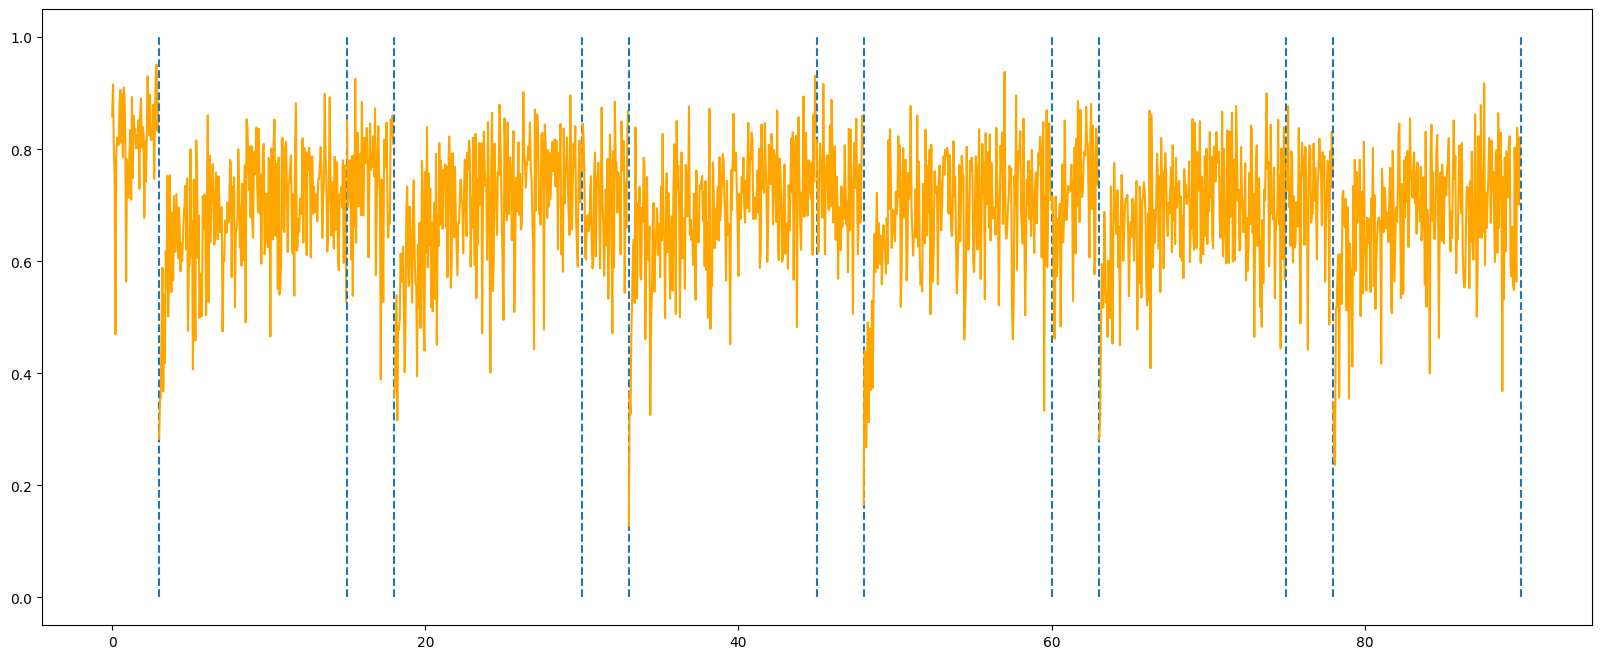

In [10]:
fig, axs = plt.subplots(figsize=(20, 8))
offset = 0
exp_num = "exp9"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp9_res[exp9_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        axs.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="orange")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        axs.vlines([offset], 0,1, linestyles='dashed')


In [11]:
offset = 0
exp_num = "exp9"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df[df.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "valid_acc"]
        
        
        plt.plot(train_acc.step + offset, train_acc.value)
        offset += len(train_acc)
        print(len(train_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

NameError: name 'df' is not defined

In [ ]:
offset = 0
exp_num = "exp9"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df[df.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        plt.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="orange")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        plt.vlines([offset], 0,1, linestyles='dashed')


offset = 0
exp_num = "exp9"
for step in range(1,7):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df[df.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "valid_acc"]
        
        
        plt.plot(train_acc.step + offset, train_acc.value, color = 'blue')
        offset += len(train_acc)
        print(len(train_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

12
12
12
12
12
12


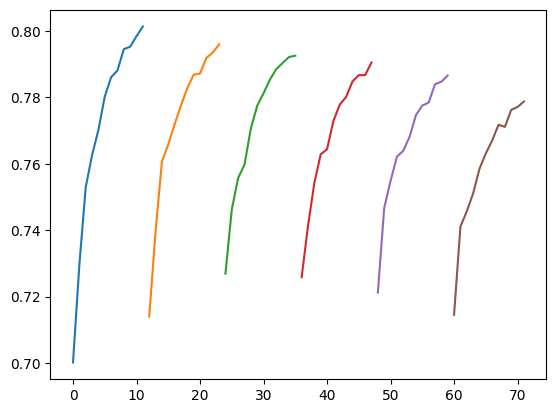

In [12]:
offset = 0
exp_num = "exp9"
for step in range(1,7):
    for stage in ["finetune"]:
        val_acc = exp9_res[exp9_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        val_acc = val_acc[val_acc.name == "valid_acc"]
        
        
        plt.plot(val_acc.step + offset, val_acc.value)
        offset += len(val_acc)
        print(len(val_acc))

In [13]:
exp9_val_acc = [0.75]
for step in range(1,7):
    for stage in ["finetune"]:
        val_acc = exp9_res[exp9_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        val_acc = val_acc[val_acc.name == "valid_acc"]
        # print(val_acc['value'][-1:])
        exp9_val_acc.append(val_acc['value'][-1:].to_numpy()[0])
exp9_val_acc

[0.75,
 0.8012986779212952,
 0.7959144711494446,
 0.792512059211731,
 0.790472149848938,
 0.786541759967804,
 0.7787178158760071]

In [14]:
exp9_model_size_iter = [4735825, 4560809, 4404541, 4273477, 4152962, 4051729, 3970067]

In [15]:
exp9_sparsity = []
for i in range(len(exp9_model_size_iter)):
    exp9_sparsity.append(1 - exp9_model_size_iter[i] / exp9_model_size_iter[0])

Text(0.5, 1.0, 'Performance vs Sparsity - Experiment 9')

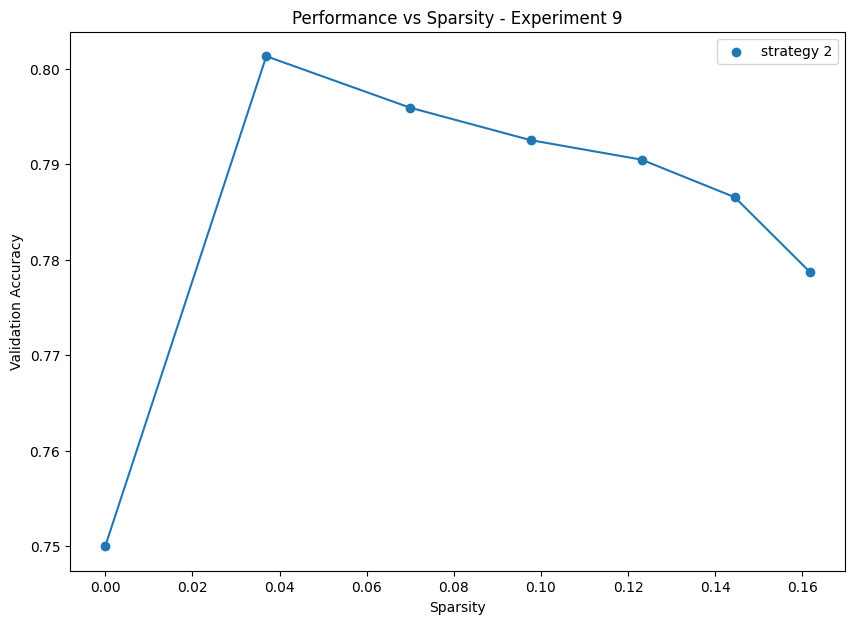

In [16]:
fig, axs = plt.subplots(figsize=(10,7))
# axs.scatter(exp4_sparsity, exp4_model_acc_iter, label="strategy 1")
# axs.plot(exp4_sparsity, exp4_model_acc_iter)
axs.scatter(exp9_sparsity, exp9_val_acc, label="strategy 2")
axs.plot(exp9_sparsity, exp9_val_acc)
axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - Experiment 9")

In [17]:
exp11_sparsity, exp11_val_acc = ([0.0,
  0.09235370817122679,
  0.15312369017013927,
  0.19201828614866467,
  0.2186738319089071,
  0.2345523747182381,
  0.24467563729656394],
 [0.75,
  0.7819785475730896,
  0.7684178352355957,
  0.7533857822418213,
  0.7362790703773499,
  0.7265152335166931,
  0.7178179025650024])

Text(0.5, 1.0, 'Performance vs Sparsity - Experiment 9')

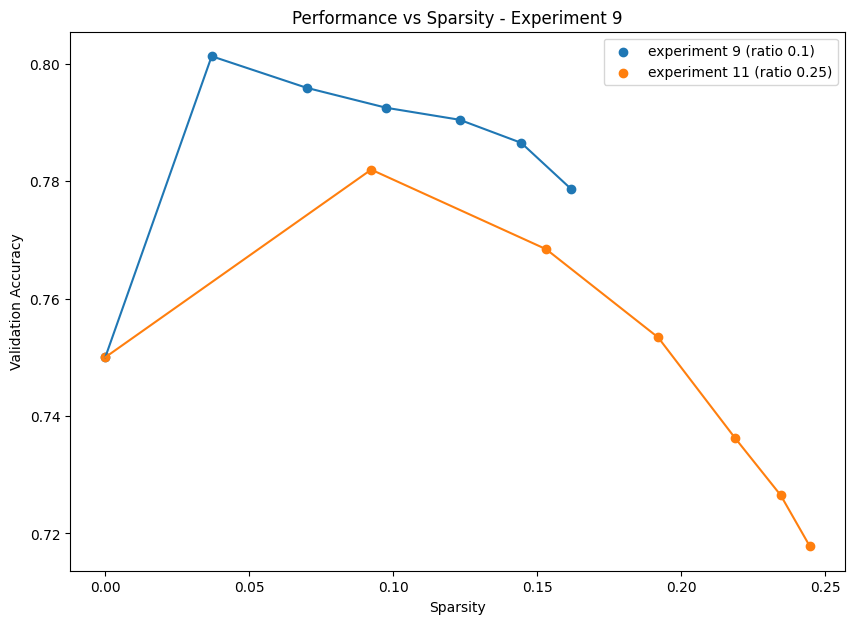

In [18]:
fig, axs = plt.subplots(figsize=(10,7))

axs.scatter(exp9_sparsity, exp9_val_acc, label="experiment 9 (ratio 0.1)")
axs.plot(exp9_sparsity, exp9_val_acc)
axs.scatter(exp11_sparsity, exp11_val_acc, label="experiment 11 (ratio 0.25)")
axs.plot(exp11_sparsity, exp11_val_acc)

axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - Experiment 9")

In [19]:
exp4_model_size_iter = [4735825, 4398782, 4158662, 4029203, 3932515, 3874012, 3832886]
exp4_model_acc_iter = [0.75, 0.713819, 0.501036, 0.495939, 0.467798,  0.476604, 0.493471]
exp4_sparsity = []
for i in range(len(exp4_model_size_iter)):
    exp4_sparsity.append(1 - exp4_model_size_iter[i] / exp4_model_size_iter[0])

exp5_model_size_iter = [4735825, 4605918, 4476708, 4376520, 4295517, 4220238, 4147165, 4082626, 4028562, 3987670, 3958666, 3931900,3908419,3888909,3870814,3855166,3840072]
exp5_model_acc_iter = [0.75,
 0.7302373051643372,
 0.5465355515480042,
 0.5546813011169434,
 0.5536966323852539,
 0.5650492906570435,
 0.5708903670310974,
 0.5760945677757263,
 0.5677136182785034,
 0.5634236335754395,
 0.5717630386352539,
 0.5829297304153442,
 0.5836454033851624,
 0.5899275541305542,
 0.5911630392074585,
 0.5920844674110413,
 0.5923865437507629]
exp5_sparsity = []
for i in range(len(exp5_model_size_iter)):
    exp5_sparsity.append(1 - exp5_model_size_iter[i] / exp5_model_size_iter[0])

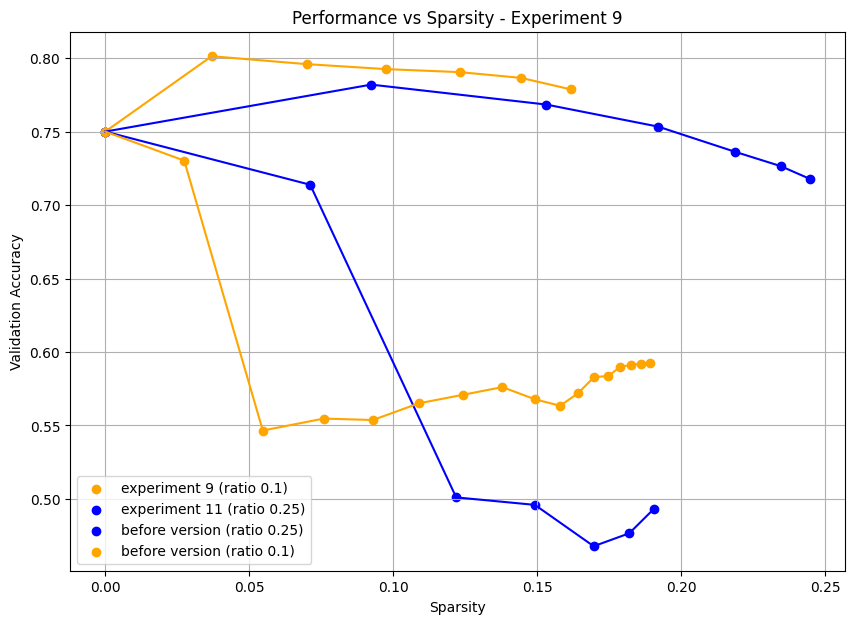

In [20]:
fig, axs = plt.subplots(figsize=(10,7))

axs.scatter(exp9_sparsity, exp9_val_acc, label="experiment 9 (ratio 0.1)", color = "orange")
axs.plot(exp9_sparsity, exp9_val_acc, color = "orange")
axs.scatter(exp11_sparsity, exp11_val_acc, label="experiment 11 (ratio 0.25)", color = 'blue')
axs.plot(exp11_sparsity, exp11_val_acc, color = 'blue')

axs.scatter(exp4_sparsity, exp4_model_acc_iter, label="before version (ratio 0.25)", color = 'blue')
axs.plot(exp4_sparsity, exp4_model_acc_iter, color = 'blue')
axs.scatter(exp5_sparsity, exp5_model_acc_iter, label="before version (ratio 0.1)", color = "orange")
axs.plot(exp5_sparsity, exp5_model_acc_iter, color = "orange")

axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - Experiment 9")
axs.grid(True)

In [39]:
# step1 scaleBN max val acc: 0.8589972853660583
# step1 train max val acc: 0.8453029990196228
# step2 scaleBN max val acc: 0.8399819135665894
# step2 train max val acc: 0.8442984223365784
# step3 scaleBN max val acc: 0.8397400975227356
# step3_train max val acc: 0.8226560354232788
# step3_train max val acc: 0.8415191769599915
# step4_scalingBN max val acc: 0.8387291431427002
# step4_train max val acc: 0.8395448327064514

# step 1 scaling max val acc: 0.8603277802467346
# step 1 train max val acc: 0.8389070630073547
# step 2 scaling max val acc: 0.8355829119682312
# step 2 train max val acc: 0.8334641456604004
# step 3 scaling max val acc: 0.8308243751525879
# step 3 train max val acc: 0.8264462351799011
# step 4 scaling max val acc: 0.8234904408454895
# step 4 train max val acc: 0.8201659917831421
# step 5 train max val acc: 0.8114815354347229
# step 6 scaling max val acc: 0.810856282711029
# step 6 train max val acc: 0.8085048198699951

exp12_val_acc = [0.75, 0.8453029990196228, 0.8442984223365784, 0.8415191769599915, 0.8395448327064514, 0.8387743234634399]
exp13_val_acc = [0.75, 0.8389070630073547, 0.8334641456604004, 0.8264462351799011, 0.8201659917831421, 0.8114815354347229, 0.8085048198699951]

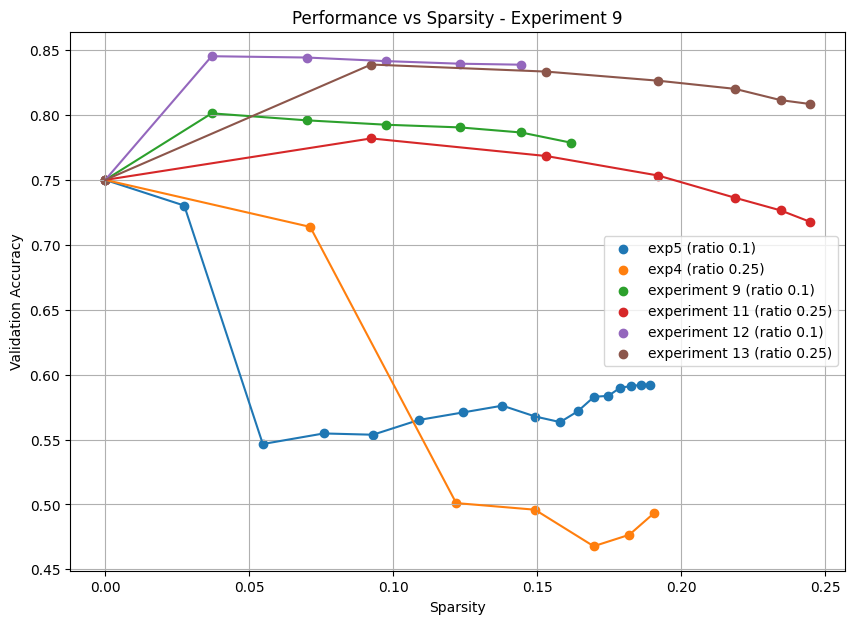

In [40]:
fig, axs = plt.subplots(figsize=(10,7))

axs.scatter(exp5_sparsity, exp5_model_acc_iter, label="exp5 (ratio 0.1)")
axs.plot(exp5_sparsity, exp5_model_acc_iter)
axs.scatter(exp4_sparsity, exp4_model_acc_iter, label="exp4 (ratio 0.25)")
axs.plot(exp4_sparsity, exp4_model_acc_iter)


axs.scatter(exp9_sparsity, exp9_val_acc, label="experiment 9 (ratio 0.1)")
axs.plot(exp9_sparsity, exp9_val_acc)
axs.scatter(exp11_sparsity, exp11_val_acc, label="experiment 11 (ratio 0.25)")
axs.plot(exp11_sparsity, exp11_val_acc)



axs.scatter(exp9_sparsity[:6], exp12_val_acc, label="experiment 12 (ratio 0.1)")
axs.plot(exp9_sparsity[:6], exp12_val_acc)

axs.scatter(exp11_sparsity[:7], exp13_val_acc, label="experiment 13 (ratio 0.25)")
axs.plot(exp11_sparsity[:7], exp13_val_acc)


axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - Experiment 9")
axs.grid(True)